<center><b><h1>COMPUTER VISION</h1></b></center>

<center><b><h1>IMAGE CLASSIFICATION USING MACHINE LEARNING</h1></b></center><br>
<center>WENAREEBA INNOCENT  | Reg No : 2021/HD05/2315U</center>





# Image classificaiton using Traditional Machine learning

Image classification is an instance where a computer is able to analyze an image , and be able to identify the class where a particular image belongs , in this research am using traditional machine learning methods , i handle the crop classification for banana and cassava classes. 

# Dataset Information

I have used a total of 200 Images and split it in ration of 80:20

# Process of Classification (ML)

1. Cropping the dataset
2. Reviewing the Cropped dataset
3. Loading the dataset in notebook
4. Training 
5. Validation
6. Prediction 

# Cropping the Dataset

In cropping i used adobe photoshop tool which has artificial intelligence capabilities where i trained the software with one image , and showed it the dimensions to crop the cassava and also gave it dimensions to crop the banana , and i selected the photoshop actions and then started recording, i recorded the process of cropping one photo and one class and then saved the single file and then stopped the recording in the software. To crop the other images with their dimensions following the initial image , i clicked on file, then automate and then selected the target folder of images i want to crop,and selected the destination, and then selected the recording i had used to handle cropping, it was able to crop all the images for like a period of 15 minutes and then saved each automatically to the cropped destination folder. 

# Importing Libraries

I imported the different libraries that i was going to use in the classification  i had to first install sklearn library.

In [1]:
# i installed sklearn library
# !pip install sklearn

In [2]:
# import libraries
from skimage.feature import hog
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import os
import glob
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Creating a base path 

I created a base path where i read my data from

In [3]:
import os
base_path="/home/wandie/notebook/jupyterenv/Question1cv"
os.chdir(base_path)
print("Base path : ",base_path)

Base path :  /home/wandie/notebook/jupyterenv/Question1cv


# Dataset Reading & Feature Extraction

I read my dataset using matplot lib where i loaded an array of images while displaying a random sample of some of the images to show how they look like, and then used a single image to extract features which i was then able to propage on to the entire dataset for classification. In feature extraction is there  various features can be extracted like pixel values, color histograms so that they can allow me to be able to classify the images.

<b>Reading a random sample of images from the dataset trainng data</b>

/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame76.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame50.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame72.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame78.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame97.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame6.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame1.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame67.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame66.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame32.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame19.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/frame54.jpg
/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/banana/

<Figure size 432x288 with 0 Axes>

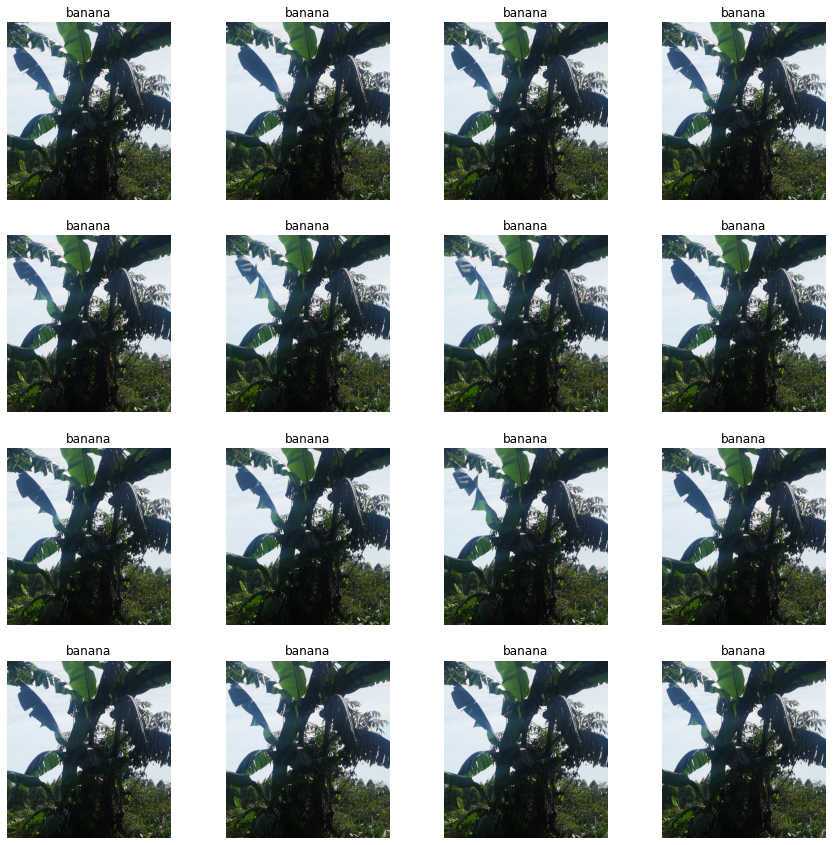

<Figure size 432x288 with 0 Axes>

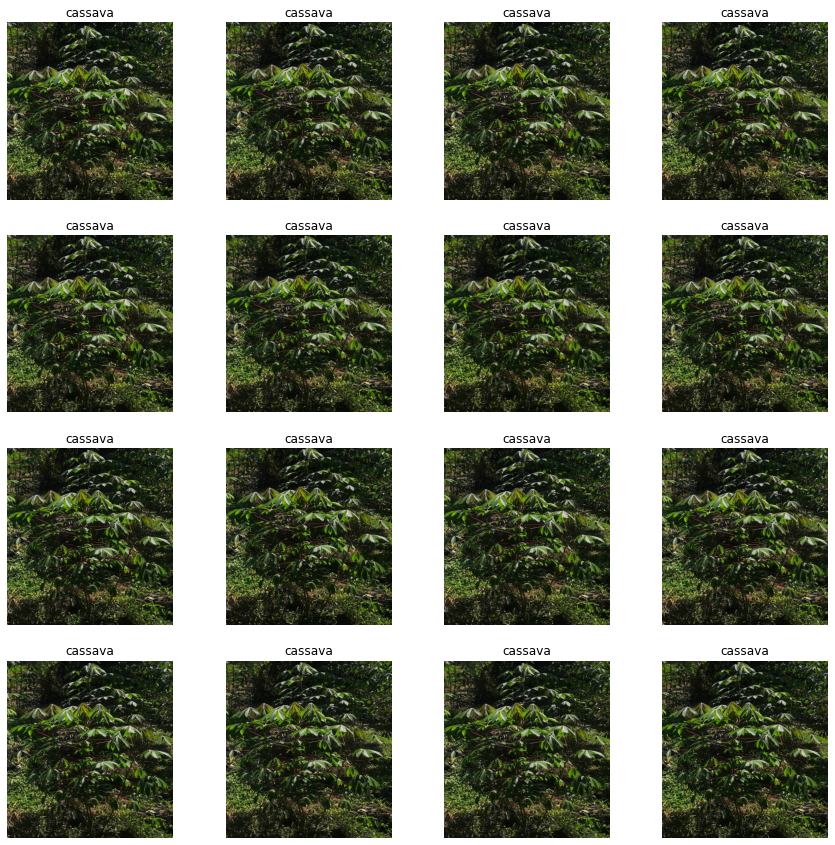

In [4]:
# plot cropped dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os


directory=os.listdir('/home/wandie/notebook/jupyterenv/Question1cv/dataset/train')
for each in directory:
    plt.figure()
    currentFolder = '/home/wandie/notebook/jupyterenv/Question1cv/dataset/train/' + each
    plt.figure(figsize=(15,15))
    for i, file in enumerate(os.listdir(currentFolder)[0:16]):
      fullpath = currentFolder+ "/" + file
      print(fullpath)
      # read full path
      img=mpimg.imread(fullpath)
      # pick file name
      file_name = os.path.basename(currentFolder)
      ax = plt.subplot(4,4, i+1)
      plt.axis("off")
      plt.title(file_name)
      plt.imshow(img)

<b>Reading a  images  to do the feature extraction and later map the features extracted on entire dataset </b>

In [5]:
# Read a random single image for cassava and banana 
# To see how they look like in the dataset

# cropped image dataset
# img  = cv2.imread(r"dataset/train/banana/frame0.jpg",cv2.IMREAD_GRAYSCALE)
img  = cv2.imread(r"dataset/train/cassava/frame0.jpg",cv2.IMREAD_GRAYSCALE)
img2   = cv2.imread(r"dataset/train/banana/frame0.jpg",cv2.IMREAD_GRAYSCALE)
img3  = cv2.imread(r"dataset/uncropped/frame282.jpg",cv2.IMREAD_GRAYSCALE)

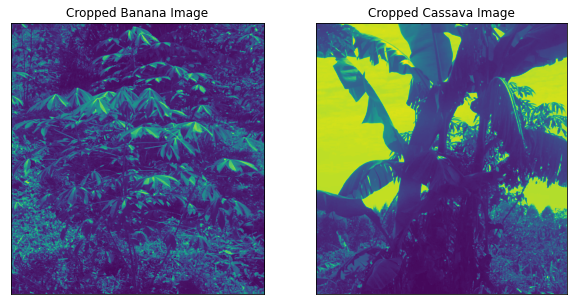

In [6]:
# plott
plt.figure(figsize=(10,5))
# cropped banana plot
plt.subplot(121),plt.imshow(img),plt.title('Cropped Banana Image')
plt.xticks([]), plt.yticks([])
# cropped cassava
plt.subplot(122),plt.imshow(img2),plt.title('Cropped Cassava Image')
plt.xticks([]), plt.yticks([])
# display the plot
plt.show()

## Sift Feature Extraction


In [7]:
## create SIFT feature extractor
sift = cv2.xfeatures2d.SIFT_create()

# # detect features from the image
# keypoints, descriptors = sift.detectAndCompute(img1_cropped_cassava, None)
keypoints = sift.detect(img3, None)

# draw keypoints
img_keypoints_image = cv2.drawKeypoints(img,keypoints,None)

# keypoints with descriptors
keypoints, descriptors = sift.detectAndCompute(img, None)
img_keypoints_casava_descriptors = cv2.drawKeypoints(img,keypoints,None)

[ WARN:0@13.817] global /io/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (13) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


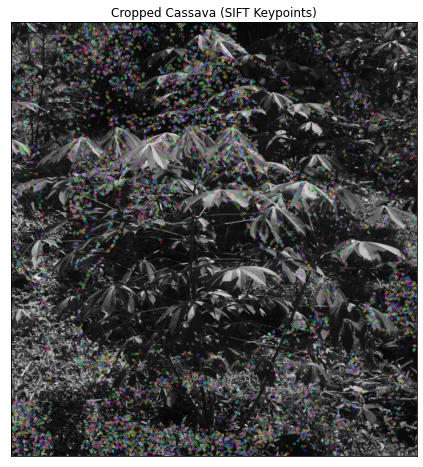

In [8]:
# draw keypoints
# plott
plt.figure(figsize=(16,10))
# cropped banana plot
plt.subplot(121),plt.imshow(img_keypoints_image),plt.title('Cropped Cassava (SIFT Keypoints)')
plt.xticks([]), plt.yticks([])
# display the plot
plt.show()

## TEST SIFT MATCHING WITH ANOTHER IMAGE ,

In [9]:
import cv2

# read the images
# img1 = cv2.imread(r"/content/drive/MyDrive/crops_dataset_general/cropped_crops_dataset/set1_cropped/cassava/frame0.jpg",cv2.IMREAD_GRAYSCALE)
# # img2 = img1_cropped_cassava
# img2 = cv2.imread(r"/content/drive/MyDrive/Garden Crop Images/Set 1/frame1.jpg",cv2.IMREAD_GRAYSCALE)


# create SIFT object
sift = cv2.xfeatures2d.SIFT_create()
# detect SIFT features in both images
keypoints_1, descriptors_1 = sift.detectAndCompute(img,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img3,None)

In [10]:
# create feature matcher
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
# match descriptors of both images
matches = bf.match(descriptors_1,descriptors_2)

# sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)
# draw first 50 matches
matched_img = cv2.drawMatches(img, keypoints_1, img3, keypoints_2, matches[:50], img2, flags=2)

In [11]:
# !pip install google-colab

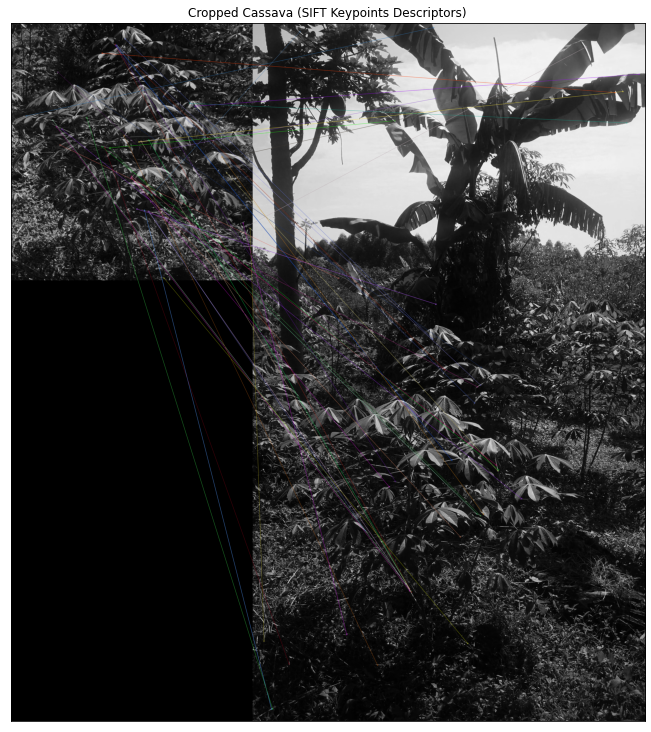

In [12]:

# plott
plt.figure(figsize=(25,15))
# cropped banana plot
plt.subplot(121),plt.imshow(matched_img),plt.title('Cropped Cassava (SIFT Keypoints Descriptors)')
plt.xticks([]), plt.yticks([])
# display the plot
plt.show()

## Canny Edge Feature Extraction

In [13]:
# !pip install opencv-contrib-python

In [14]:
# !pip install opencv-python


(Text(0.5, 1.0, 'Canny Edge Image (Cassava)'), ([], []), ([], []))

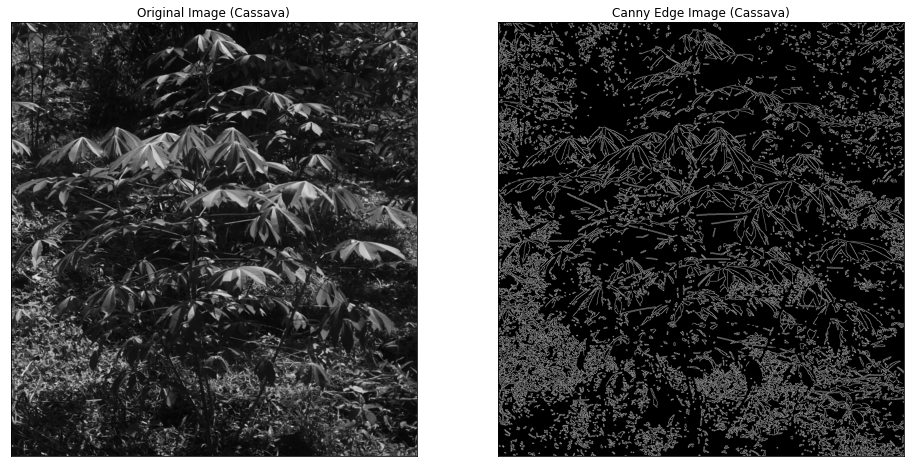

In [15]:
# banana
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
canny_edges = cv.Canny(img,100,200)
plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image (Cassava)'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_edges,cmap = 'gray')
plt.title('Canny Edge Image (Cassava)'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Canny Edge Image (Banana)'), ([], []), ([], []))

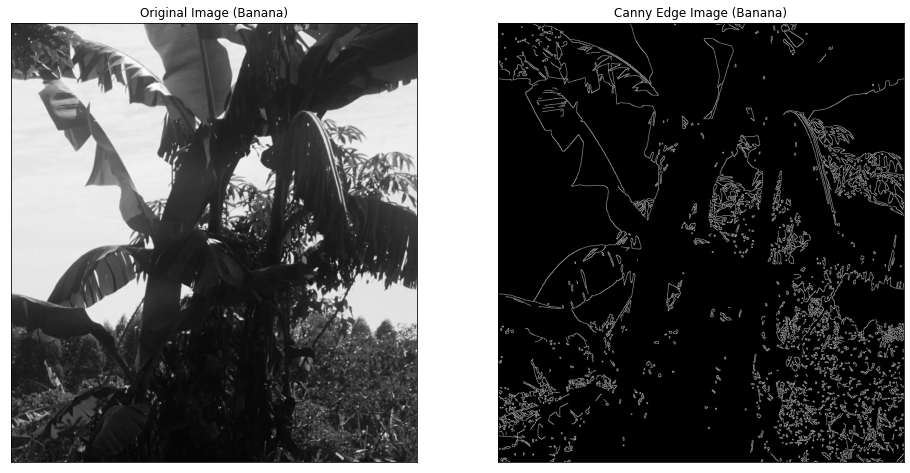

In [16]:
# cassava
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
canny_edges = cv.Canny(img2,100,200)
plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Image (Banana)'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(canny_edges,cmap = 'gray')
plt.title('Canny Edge Image (Banana)'), plt.xticks([]), plt.yticks([])

## Sobel Edge Feature Extraction

(Text(0.5, 1.0, 'Sobel Edge  Banana Image'), ([], []), ([], []))

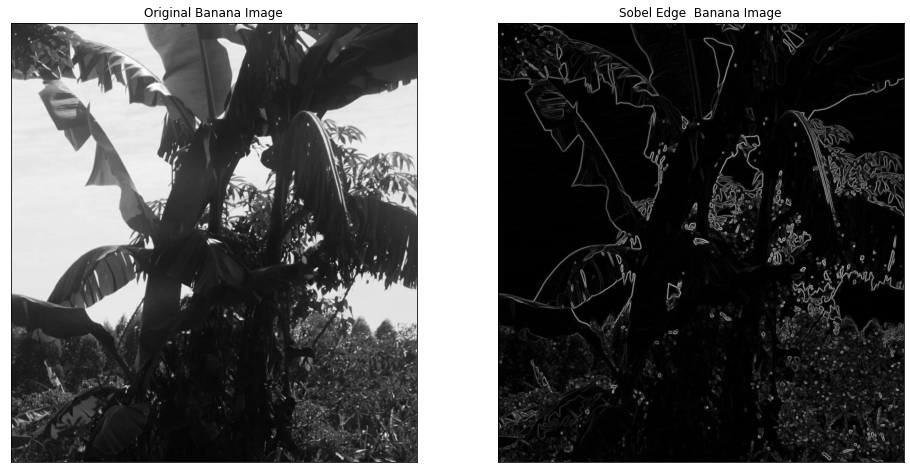

In [17]:
# sobel on banana
import numpy as np
import cv2 as cv
from skimage import filters

from matplotlib import pyplot as plt
ed_sobel = filters.sobel(img2)

plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img2,cmap = 'gray')
plt.title('Original Banana Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ed_sobel,cmap = 'gray')
plt.title('Sobel Edge  Banana Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Sobel Edge Image'), ([], []), ([], []))

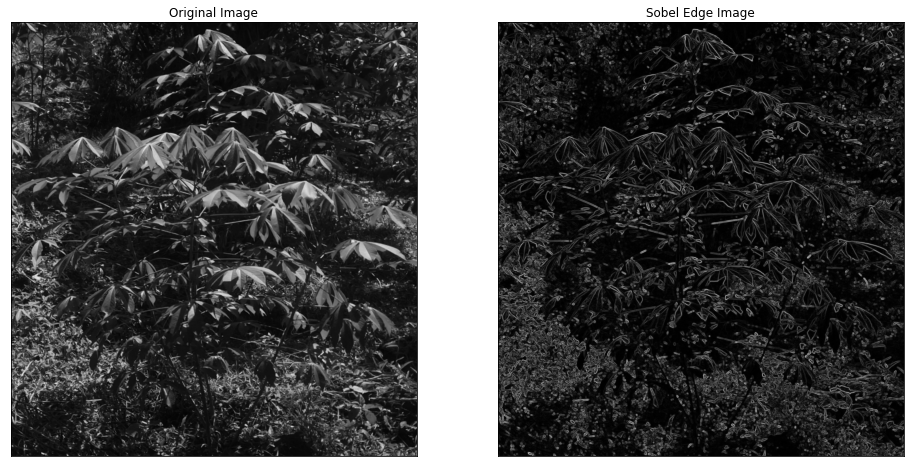

In [18]:
# sobel on banana
import numpy as np
import cv2 as cv
from skimage import filters

from matplotlib import pyplot as plt
ed_sobel = filters.sobel(img)

plt.figure(figsize=(16,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(ed_sobel,cmap = 'gray')
plt.title('Sobel Edge Image'), plt.xticks([]), plt.yticks([])

## Pixel Values 

The number of pixels in an image is the same as the size of the image for grayscale images we can find the pixel features by reshaping the shape of the image and returning the array form of the image.

To access pixel data in Python image, use numpy and opencv-python library. Import numpy and cv2(opencv-python) module inside your program file. Then read the image file using the imread() function.

In [19]:
import numpy as np
import cv2

print(img)

[[ 28  29  27 ...  72  65  63]
 [ 30  28  30 ...  67  57  55]
 [ 34  30  31 ...  62  55  58]
 ...
 [114 102  63 ...  97 111 121]
 [148 114  58 ...  75  96 111]
 [161 108  57 ...  39  58  87]]


In [20]:
# check the type of array
print(type(img))

<class 'numpy.ndarray'>


In [21]:
print("The image length of the Image is:" , len(img))
print("It indicates the number of rows in the Image.")

The image length of the Image is: 1419
It indicates the number of rows in the Image.


In [22]:
print("Number of Top rows is : ",len(img[0]))

Number of Top rows is :  1327


In [23]:
print("That means our Image has a total pixels :  ",img[11, 21])

That means our Image has a total pixels :   54


image (1419, 1327, 3)


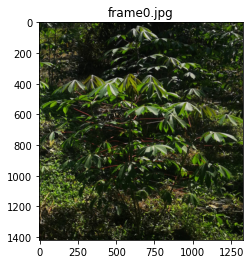

In [24]:
# read a single image for feature extraction
img =  np.array(mpimg.imread('dataset/train/cassava/frame0.jpg'))
# shape of image
print('image', img.shape)
file_name = os.path.basename('dataset/train/cassava/frame0.jpg')
plt.imshow(img)
plt.title(file_name)
plt.show()

## IMAGE RESIZING

i resized the image to make the algorithm work faster on it, if an image has high resolution it takes time for it to train and reduces accuracy. So i was able to resize it to a size of (64x128).



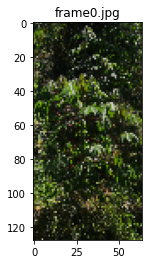

In [25]:
# resizing the image
resize_image = cv2.resize(img,(64,128))
file_name = os.path.basename('dataset/train/banana/frame0.jpg')
plt.imshow(resize_image)
plt.title(file_name)
plt.show()


## Shape of the Image

Here i Print Get the shape of the Image that i fetched from the dataset .

In [26]:
# print image shape
print(resize_image.shape)

(128, 64, 3)


## HOG (Histogram of Oriented Graphics) Features

I extract Histogram Features from the image (hog) . These features will be used in identifying a crop ie its label. I also reduce on the number of features by reshaping the image since to be able to easily classify the images , we have to work with reduced features.

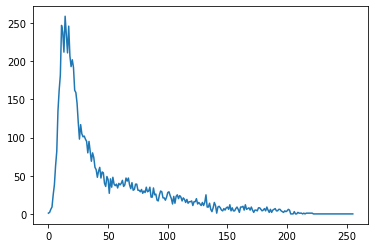

In [27]:
# extract color histogram features from the image
# importing required libraries of opencv
import cv2
  
# importing library for plotting
from matplotlib import pyplot as plt
  
# find frequency of pixels in range 0-255
histr = cv2.calcHist([resize_image],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

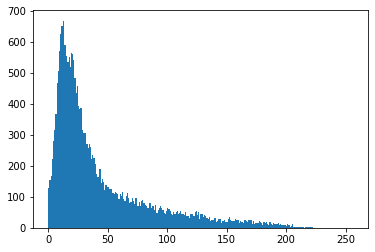

In [28]:
import cv2
from matplotlib import pyplot as plt
  
# alternative way to find histogram of an image
plt.hist(resize_image.ravel(),256,[0,256])
plt.show()

In [29]:
# HOG Features extraction

fd,hog_image = hog(resize_image,visualize=True,channel_axis=-1)
# image shape
print("FD Shape :",fd.shape)
print("FD  :",fd)
print("Histogram Image Shape (They were reduced) :",hog_image.shape)

FD Shape : (6804,)
FD  : [0.20902253 0.09613142 0.06488155 ... 0.05219621 0.02851676 0.13799051]
Histogram Image Shape (They were reduced) : (128, 64)


## Print the new image with Features
Here i print the new image with the featues extracted, and convert it to gray scale.

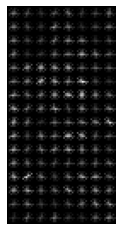

In [30]:
# Plot the new image with features
plt.axis("off")
plt.imshow(hog_image,cmap="gray")
plt.show()

## Training Dataset

I created my training dataset of cropped images , which had two classes , banana and cassava , and created and placed it in the train directory . It had images with the format of .jpg. I use this for training my model.

Banana Training Data

In [31]:
# Banana Training data
data_banana = []
for entry in glob.glob("dataset/train/banana/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img,(64,32))
    # access the hog features and store it here
#     fd = hog(resized_img,multichannel=True)
    fd = hog(resized_img,channel_axis=-1)
    data_banana.append(fd)

Shape of Banana Dataset

In [32]:
# shape of banana
# data_banana
print(len(data_banana))

101


Cassava Training data

In [33]:
# Cassava Training Data
data_cassava = []
for entry in glob.glob("dataset/train/cassava/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img,(64,32))
    # access the hog features and store it here
    fd = hog(resized_img,channel_axis=-1)
    data_cassava.append(fd)

Shape of cassava training data

In [34]:
# data_cassava
print(len(data_cassava))

101


## Combined Training data

I combined the training data to become one dataset , which is comprised of cassava dataset and banana dataset.

In [35]:
# Combine the training dataset into 1
# cassava and banana
train_data = data_banana + data_cassava
# training_data_combined

Shape of Combined training dataset

In [36]:
# length of training data
print(len(train_data))

202


## Train data labeling

I did the Labeling the relevant data for cassava and banana in this section.

In [37]:
# labeling
train_label_list = []
for i in range(len(train_data)):
    if i < 101:
        train_label_list.append('banana')
    else:
        train_label_list.append('cassava')
        
print("Training Label List")
print(train_label_list)
print("\nTraining Label Count :",len(train_label_list))

Training Label List
['banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana',

## Test dataset Labeling

For the test dataset, i labelled it with an approach of creating two dictionaries with the data and label , and then i appended it to the list.t

In [38]:
# Banana Test data
test_banana = []
for entry in glob.glob("dataset/test/banana/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img,(64,32))
    # access the hog features and store it here
    fd = hog(resized_img,channel_axis=-1)
    # dictionary
    test_dict = {'data':fd,'label':'banana'}
    test_banana.append(test_dict)

In [39]:
print(len(test_banana))

110


In [40]:
# Cassava Test data
test_cassava = []
for entry in glob.glob("dataset/test/cassava/*.jpg"):
    img = np.array(mpimg.imread(entry))
    resized_img = cv2.resize(img,(64,32))
    # access the hog features and store it here
    fd = hog(resized_img,channel_axis=-1)
    # dictionary
    test_dict = {'data':fd,'label':'cassava'}
    test_cassava.append(test_dict)

In [41]:
print(len(test_cassava))

110


In [42]:
# Combined testing dataset labels
test_data = test_banana + test_cassava
print(len(test_data))

220


## Separing data and labels to different lists


In [43]:
# features
test_features = []
test_labels = []

for i in test_data:
    test_labels.append(i['label'])
    test_features.append(i['data'])
    
print("Test Features Count : ",len(test_features))
print("Test Labels : \n",test_labels)

Test Features Count :  220
Test Labels : 
 ['banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banan

In [44]:
# # test display features
# import pandas as pd
# df = pd.DataFrame(test_features)
# df

## KNN (K - Nearest Neighbor) ALGORITHM IMPLEMENTATION

I utilized the non-parametric, supervised learning classifier k-nearest neighbors algorithm (KNN), which relies on proximity to classify or anticipate how a single data point would be grouped. Although it can be applied to classification or regression issues, it is commonly employed as a classification algorithm because it relies on the idea that comparable points can be discovered close to one another.

To test my KNN Classifyer , i used euclidean distance measure and manhattan distance measure to test and compare the accuracy i  get while using the two techniques.


## Euclidean training and prediction on different hyperparameter k

Euclidean Using different values of the hyperparameter (K), train and forecast. I created a list of metrics using the k ranges from 1 to 7 and utilized the value of k from 1 to 7.

In [45]:
# knn
x_axis_k_points = []

# LIST OF METRICS
f1_euclidean = []
accuracies_euclidean = []
conf_matrix_euclidean = []

for k in range(5):
    #KNN Classifyer train data
    knn_euclidean = KNeighborsClassifier(n_neighbors=k+1)
    knn_euclidean.fit(train_data,train_label_list)
    
    ## KNN Classifer prediction
    pred_labels_euclidean = knn_euclidean.predict(test_features)
    
    ## Accuracy of prediction
    acc_euclidean = knn_euclidean.score(test_features,test_labels)
    accuracies_euclidean.append(acc_euclidean)
    
    ## confusion matrix prediction euclidean
    conf_matrix_euclidean.append(metrics.confusion_matrix(test_labels, pred_labels_euclidean))
    
    ## F1 score prediction
    f1_euclidean.append(metrics.f1_score(test_labels, pred_labels_euclidean ,pos_label='banana'))
    
    x_axis_k_points.append(k+1)
    

## Manhattan training and prediction on different hyperparameter k

Manhattan Different Hyper-parameter (K) values are used during training and prediction. I created a list of metrics using k ranges from 1 to 5 and used k from values k=1 to k=5.

In [46]:
# knn
x_axis_k_points = []

# LIST OF METRICS
f1_manhattan = []
accuracies_manhattan = []
conf_matrix_manhattan = []

for k in range(5):
    #KNN Classifyer train data
    knn_manhattan = KNeighborsClassifier(n_neighbors=k+1, p=1)
    knn_manhattan.fit(train_data,train_label_list)
    
     ## KNN Classifer prediction
    pred_labels_manhattan = knn_manhattan.predict(test_features)
    
     ## Accuracy of prediction
    acc_manhattan = knn_manhattan.score(test_features,test_labels)
    accuracies_manhattan.append(acc_manhattan)
    
    ## confusion matrix prediction manhattan
    conf_matrix_manhattan.append(metrics.confusion_matrix(test_labels, pred_labels_manhattan))
    
    ## F1 score prediction
    f1_manhattan.append(metrics.f1_score(test_labels, pred_labels_manhattan, pos_label='banana'))
    
    x_axis_k_points.append(k+1)
    

## METRICS EVALUATION SCORES

In this section , i evaluate the performance of KNN with both manhattan distance and euclidean distance and compute the respective accuracies, F1 score and confusion matrices.

## Manhattan Evaluation

A metric for measuring distance between two locations in an N-dimensional vector space is the Manhattan distance. It is the total length of all line segments projected onto the coordinate axes between two places. It can be defined as the total absolute difference between two points' measurements across all dimensions.

In [47]:
# create a loop and print out the f1 score , the accuracy and confusion matrix
for i in range(len(f1_manhattan)):
    print('FOR K = ', i+1 ,'F1 SCORE= ', f1_manhattan[i], 'ACCURACY= ', accuracies_manhattan[i], '\n CONFUSION MATRIX : \n ', conf_matrix_manhattan[i])

FOR K =  1 F1 SCORE=  0.8108108108108109 ACCURACY=  0.8409090909090909 
 CONFUSION MATRIX : 
  [[ 75  35]
 [  0 110]]
FOR K =  2 F1 SCORE=  0.8481675392670157 ACCURACY=  0.8681818181818182 
 CONFUSION MATRIX : 
  [[ 81  29]
 [  0 110]]
FOR K =  3 F1 SCORE=  0.8043478260869564 ACCURACY=  0.8363636363636363 
 CONFUSION MATRIX : 
  [[ 74  36]
 [  0 110]]
FOR K =  4 F1 SCORE=  0.8043478260869564 ACCURACY=  0.8363636363636363 
 CONFUSION MATRIX : 
  [[ 74  36]
 [  0 110]]
FOR K =  5 F1 SCORE=  0.7777777777777778 ACCURACY=  0.8181818181818182 
 CONFUSION MATRIX : 
  [[ 70  40]
 [  0 110]]


## Euclidean evaluation

Euclidean distance is  the distance between two points. For instance incase there are points in a plane,  it is the distance of the segment connecting the two points and its calculated using pythogras theoreme.

In [48]:
for i in range(len(f1_euclidean)):
    print('FOR K = ', i+1 ,'F1 SCORE= ', f1_euclidean[i], 'ACCURACY= ', accuracies_euclidean[i], '\n CONFUSION MATRIX : \n ', conf_matrix_euclidean[i])

FOR K =  1 F1 SCORE=  0.6826347305389222 ACCURACY=  0.759090909090909 
 CONFUSION MATRIX : 
  [[ 57  53]
 [  0 110]]
FOR K =  2 F1 SCORE=  0.6982248520710059 ACCURACY=  0.7681818181818182 
 CONFUSION MATRIX : 
  [[ 59  51]
 [  0 110]]
FOR K =  3 F1 SCORE=  0.6826347305389222 ACCURACY=  0.759090909090909 
 CONFUSION MATRIX : 
  [[ 57  53]
 [  0 110]]
FOR K =  4 F1 SCORE=  0.6904761904761904 ACCURACY=  0.7636363636363637 
 CONFUSION MATRIX : 
  [[ 58  52]
 [  0 110]]
FOR K =  5 F1 SCORE=  0.6904761904761904 ACCURACY=  0.7636363636363637 
 CONFUSION MATRIX : 
  [[ 58  52]
 [  0 110]]


## PLOTTING THE RESULTS



## F1 Score

The harmonic mean of recall and precision is the F1 score. It is a statistical metric used to evaluate performance. It is a measure of an individual's performance that takes precision and recall into account.



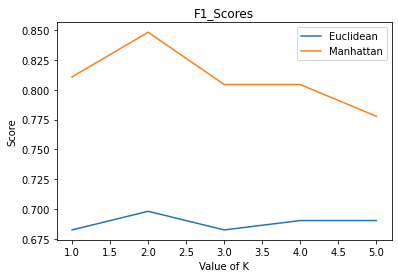

In [49]:
# F1 Scores
plt.plot(x_axis_k_points,f1_euclidean, label='Euclidean')
plt.plot(x_axis_k_points,f1_manhattan, label='Manhattan')
plt.title("F1_Scores")
plt.xlabel("Value of K")
plt.ylabel("Score")
plt.legend()
plt.show()

## Accuracy

The easiest performance metric to understand is accuracy, which is just the proportion of properly predicted observations to all observations.
Precision equals TP+TN/TP+FP+FN+TN.

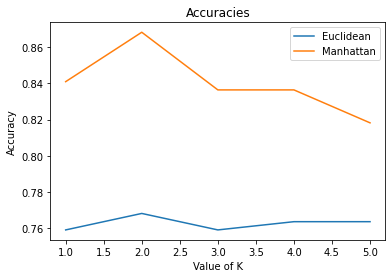

In [50]:
# Accuracies

plt.plot(x_axis_k_points,accuracies_euclidean, label='Euclidean')
plt.plot(x_axis_k_points,accuracies_manhattan, label='Manhattan')
plt.title("Accuracies")
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
# USING ANOTHER APPROACH OF KNN mnst digits dataset

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_data,train_label_list)


KNeighborsClassifier(n_neighbors=7)

# Predicting the Features (Labels)

In [53]:
y_pred = knn.predict(test_features)
y_pred

array(['banana', 'banana', 'banana', 'banana', 'banana', 'cassava',
       'banana', 'cassava', 'cassava', 'cassava', 'banana', 'cassava',
       'banana', 'cassava', 'cassava', 'banana', 'banana', 'banana',
       'banana', 'banana', 'cassava', 'cassava', 'cassava', 'cassava',
       'banana', 'cassava', 'banana', 'cassava', 'cassava', 'cassava',
       'cassava', 'banana', 'cassava', 'banana', 'banana', 'banana',
       'banana', 'banana', 'banana', 'cassava', 'cassava', 'banana',
       'banana', 'cassava', 'banana', 'cassava', 'banana', 'cassava',
       'banana', 'cassava', 'cassava', 'cassava', 'cassava', 'banana',
       'cassava', 'banana', 'banana', 'cassava', 'banana', 'banana',
       'cassava', 'cassava', 'banana', 'banana', 'banana', 'banana',
       'cassava', 'cassava', 'banana', 'cassava', 'banana', 'banana',
       'cassava', 'cassava', 'cassava', 'banana', 'banana', 'cassava',
       'banana', 'banana', 'cassava', 'cassava', 'cassava', 'cassava',
       'cassava', 'ca

# Classification Report

In [54]:
# classification report
from sklearn.metrics import classification_report
report = classification_report(test_labels, y_pred)
print(report)

              precision    recall  f1-score   support

      banana       1.00      0.52      0.68       110
     cassava       0.67      1.00      0.81       110

    accuracy                           0.76       220
   macro avg       0.84      0.76      0.74       220
weighted avg       0.84      0.76      0.74       220



## Precision

In terms of positive observations, precision is the proportion of accurately anticipated observations to all predicted positive observations.
Precision equals TP/TP+FP

## Confusion Matrix

In [55]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_labels, y_pred=y_pred)
cm

array([[ 57,  53],
       [  0, 110]])

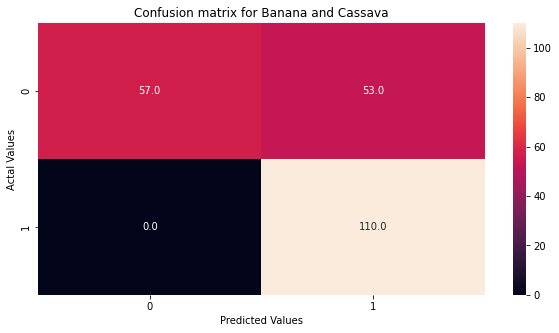

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

cm = confusion_matrix(test_labels, y_pred)
cm_df = pd.DataFrame(cm,
                 index = [0, 1], 
                 columns = [0, 1])
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True ,fmt=".1f")
plt.title('Confusion matrix for Banana and Cassava')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

### Getting specific performance score (number of correct / number of observations) by using knn.score  or metrics.accuracy.score method


In [57]:
# calculate the overal accuracy using knn score
acc = knn.score(test_features , test_labels)
print(f'Accuracy from knn.score = {acc:.4}') #to 4 decimal  places


Accuracy from knn.score = 0.7591


In [58]:
# balanced accuracy
acc_balanced = metrics.balanced_accuracy_score(test_labels,y_pred)
print(f'Accuracy from balanced accuracy score = {acc_balanced:.4}') #to 4 decimal  places


Accuracy from balanced accuracy score = 0.7591


# Analysis of the Results

In my research for image classification using traditional machine learning methods , I used K-Nearest Neighbor (KNN) to work on the classification . KNN works with distance measures to be able to classify images based on the nearest distance and in this I used a Manhattan distance and euclidean distance to be able to get the results. <br>

<b>K - ITERATIONS AND RESULTS (Manhattan Distance) </b>

<ul>
    <li>K=1 , Accuracy = 0.84   F1 Schore = 0.81   </li>
    <li>K=2  , Accuracy = 0.86  F1 Schore = 0.84  </li>
    <li>K=3  , Accuracy = 0.83   F1 Schore = 0.80  </li>
    <li>K=4  , Accuracy = 0.83  F1 Schore = 0.80  </li>
    <li>K=5   , Accuracy = 0.81   F1 Schore = 0.77  </li>

</ul>

<br>
<b>K - ITERATIONS AND RESULTS (Euclidean Distance) </b>
<ul>
    <li>K=1 , Accuracy = 0.75     F1 Schore = 0.68   </li>
    <li>K=2  , Accuracy = 0.76   F1 Schore = 0.69  </li>
    <li>K=3  , Accuracy = 0.75   F1 Schore = 0.68  </li>
    <li>K=4  , Accuracy = 0.76   F1 Schore = 0.69  </li>
    <li>K=5   , Accuracy = 0.75   F1 Schore = 0.69  </li>
 
</ul>

 <br>

<b>Best KNN Result and Distance Measure In My Project</b> <br>
In my results , in Manhattan distace , i got an average accuracy of 84% and the F1-Score of 81% and in Euclidean distance i got an average accuracy of 76% and  the F1-Score of 69% <br>

From this analysis, manhattan distance performed best with an accuracy of 84% and a F1-Score of 81%.


<br>

